МЕТРИКИ ВОВЛЕЧЁННОСТИ
Количество пользователей: 100
Количество сессий: 460
Средняя длительность сессии (мин): 16.94
Среднее кол-во сессий на человека: 4.6


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_16852\4251115073.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  users = pd.read_sql("SELECT * FROM Users_Table", conn)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_16852\4251115073.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sessions = pd.read_sql("SELECT * FROM Sessions_Table", conn)


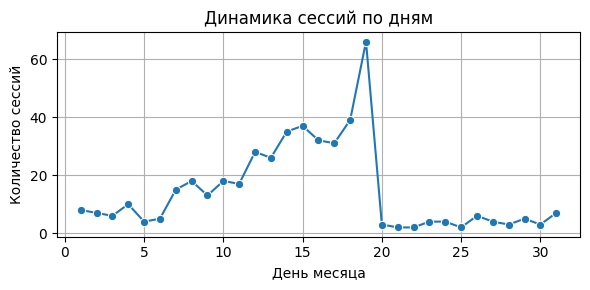

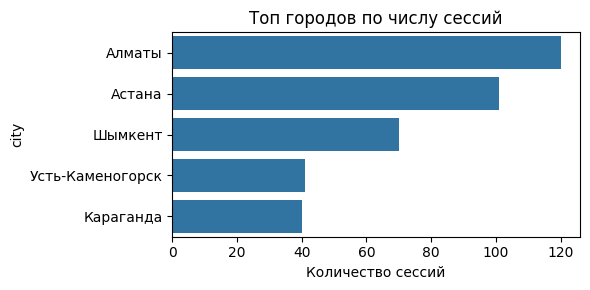

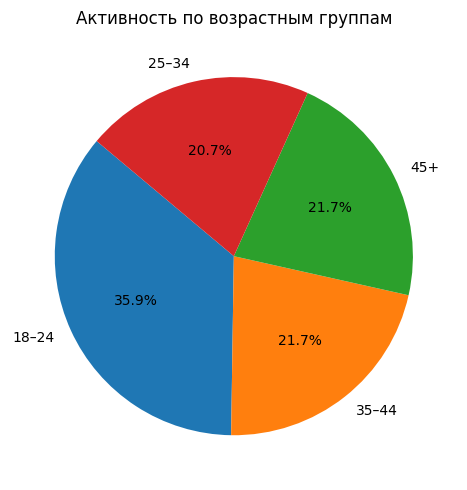

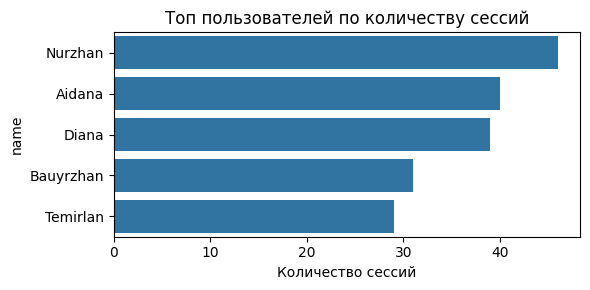

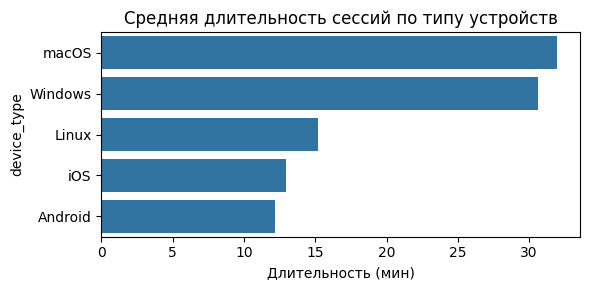

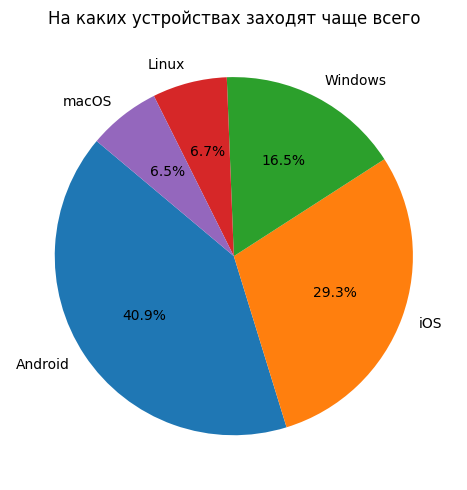

In [25]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 1. Connect to PostgreSQL database
conn = psycopg2.connect(
    host="localhost",      
    port="5432",           
    dbname="lolocourse_db",
    user="postgres",
    password="230700"
)

# Load users and sessions tables
users = pd.read_sql("SELECT * FROM Users_Table", conn)
sessions = pd.read_sql("SELECT * FROM Sessions_Table", conn)

# Assign age group based on birth year
users["age_group"] = users["birth_date"].apply(
    lambda x: "18–24" if datetime(2025, 6, 25).year - x.year < 25 else
              "25–34" if datetime(2025, 6, 25).year - x.year < 35 else
              "35–44" if datetime(2025, 6, 25).year - x.year < 45 else
              "45+"
)

# Merge user and session data into a single DataFrame
df = sessions.merge(users, on="user_id")

# Engagement metrics calculation
num_users = users["user_id"].nunique()
num_sessions = sessions["session_id"].nunique()
avg_duration = sessions["session_duration_minutes"].mean().round(2)
avg_sessions_per_user = (num_sessions / num_users)

# Print general engagement indicators
print("МЕТРИКИ ВОВЛЕЧЁННОСТИ")
print(f"Количество пользователей: {num_users}")
print(f"Количество сессий: {num_sessions}")
print(f"Средняя длительность сессии (мин): {avg_duration}")
print(f"Среднее кол-во сессий на человека: {avg_sessions_per_user}")

# Chart 1: Session trend by day
sessions_by_day = df.groupby(df["login_time"].dt.day).size()
plt.figure(figsize=(6, 3))
sns.lineplot(x=sessions_by_day.index, y=sessions_by_day.values, marker='o')
plt.title("Динамика сессий по дням")
plt.xlabel("День месяца")
plt.ylabel("Количество сессий")
plt.grid(True)
plt.tight_layout()
plt.show()

# Chart 2: Top cities by session count
top_cities = df["city"].value_counts().head(5)
plt.figure(figsize=(6, 3))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Топ городов по числу сессий")
plt.xlabel("Количество сессий")
plt.tight_layout()
plt.show()

# Chart 3: User activity by age group
age_counts = df["age_group"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(age_counts.values, labels=age_counts.index, autopct="%.1f%%", startangle=140)
plt.title("Активность по возрастным группам")
plt.tight_layout()
plt.show()

# Chart 4: Top users by session count
top_users = df["name"].value_counts().head(5)
plt.figure(figsize=(6, 3))
sns.barplot(x=top_users.values, y=top_users.index)
plt.title("Топ пользователей по количеству сессий")
plt.xlabel("Количество сессий")
plt.tight_layout()
plt.show()

# Chart 5: Average session duration by device type
avg_duration = df.groupby("device_type")["session_duration_minutes"].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 3))
sns.barplot(x=avg_duration.values, y=avg_duration.index)
plt.title("Средняя длительность сессий по типу устройств")
plt.xlabel("Длительность (мин)")
plt.tight_layout()
plt.show()

# Chart 6: Device type distribution
device_counts = df["device_type"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(device_counts.values, labels=device_counts.index, autopct="%.1f%%", startangle=140)
plt.title("На каких устройствах заходят чаще всего")
plt.tight_layout()
plt.show()
